<a href="https://colab.research.google.com/github/Dohy-Lee/ML_DL.Basic/blob/main/7_3)Neural_Network_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input,test_target)=\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100,activation='relu'))
  if a_layer:#케라스층을 추가한다면
    model.add(a_layer) #은닉층 뒤에 또 하나의 층 추가
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

In [3]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)# verbose = 0 :훈련과정 출력 X, 1 : 진행 막대 및 손실 등의 지표 출력, 2: 진행 막대 제외한 손실 등의 지표 출력
print(history.history.keys())#history 객체 안에는 훈련 측정값이 담긴 history 딕션너리가 있음

dict_keys(['loss', 'accuracy'])


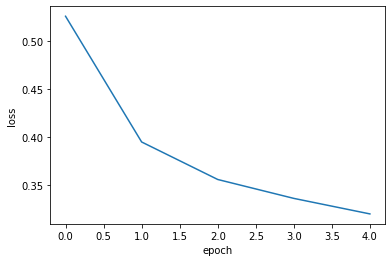

In [5]:
#손실값
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

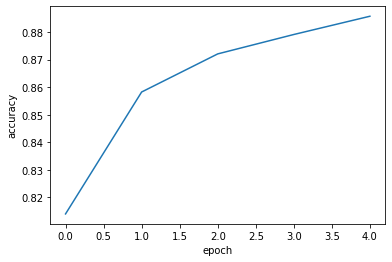

In [6]:
#정확도
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

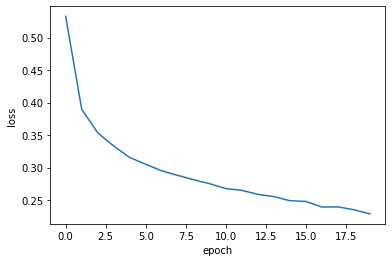

In [7]:
#loss가 점차 줄어듦으로, 에포크를 늘림
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose= 0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [8]:
#인공 신경망 모델이 최적화하는 대상은 손실 함수임. 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있기에, 손실 함수의 값을 확인하는 것이 더 나음
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled,val_target))
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


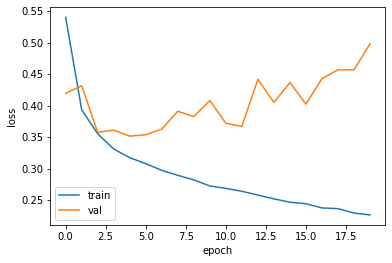

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show() #훈련데이터에 대해선 계속 loss가 감소하지만, 검증 데이터에 대해선 약 6에포크 이후로 증가함 → 과대적합의 경향을 띠고 있음
           #검증 손실이 증가하는 시점(약 6 에포크)을 간으한 뒤로 늦추면 검증 세트에 대한 손실이 줄어듦 & 검증 세트에 대한 정확도 증가

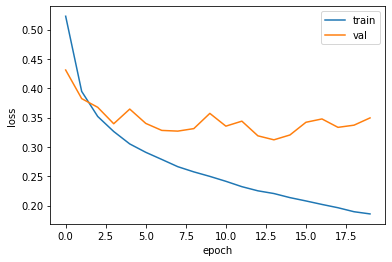

In [10]:
#RMSporp 옵티마이저는 많은 문제에 대해 잘 동작함. RMSprop대신 다른 옵티마이저를 테스트해본다면 Adam이 좋은 선택이 될 것
#Adam : 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조정할 수 있음.
model = model_fn()
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics='accuracy') #adam의 학습률 조정 해보기
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()#adam을 쓰기 전보다 과대적합이 훨씬 줆

In [11]:
#드롭아웃 : 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막음
#1. 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고, 모든 입력에 주의를 기울여야함
#2. 각각의 랜덤하게 뉴런이 꺼진 신경망들의 앙상블로도 볼 수 있음
# 평가와 예측에 사용될 때는 드롭아웃을 하지 않음(하지않아야 함)
model = model_fn(keras.layers.Dropout(0.3)) # 30%정도의 드롭아웃
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


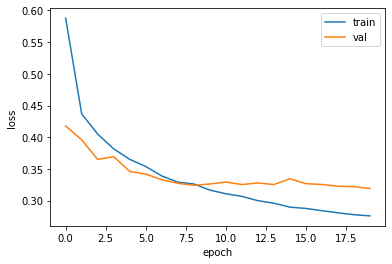

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show() #에포크 횟수를 약 10~11회로 줄여야함

In [13]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose = 0, validation_data = (val_scaled, val_target))
model.save_weights('model-weights.h5')#save_weight : 훈련된 모델의 파라미터 저장. 일반적으로 텐서플로의 체크포인트 포맷으로 저장하지만, 파일 확장자가 '.h5'일 경우 HDF5 포맷으로 저장
model.save('model-whole.h5') #save :모델 구조와 모델 파라미터를 함께 저장. 일반적으로 텐서플로의 체크포인트 포맷으로 저장하지만, 파일 확장자가 '.h5'일 경우 HDF5 포맷으로 저장

In [14]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Jun 25 17:44 model-weights.h5
-rw-r--r-- 1 root root 982664 Jun 25 17:44 model-whole.h5


In [30]:
#훈련하지 않은 모델 + 파라미터는 model.save_weights
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')#load_weights : save_weights메소드로 저장했던 모델과 정확히 같은 구조를 가져야함
#참고사항 evalueate 메소드는 손실을 계산하기 위해선 compile()메소드가 선행되어야함. 여기선 정확도만 필요하므로 안씀
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1) #argmax : 배열에서 가장 큰 값의 인덱스 반환, 
                                                          #케라스의 predict : sklearn과 달리 10개의 클래스(패션MNIST가 10개의 다중분류이기 때문에, 이진 분류라면 양성클래스에 대한 확률 하나만)에 대한 확률 반환 
print(np.mean(val_labels == val_target))

0.88


In [32]:
model = keras.models.load_model('model-whole.h5')
#load_model쓰면 compile메소드 없이 evaluate 메소드 사용 가능
model.evaluate(val_scaled, val_target) 

375/375 [==============================] - 1s 2ms/step - loss: 0.3334 - accuracy: 0.8800


[0.3333590626716614, 0.8799999952316284]

In [33]:
#콜백 : 훈련 과정 중간에 어떤 작업을 수행할 수 있게 해주는 메소드. fit메서드의 callbacks 매개변수에 리스트로 전달하여 사용함
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5') #ModelCheckpoint 콜백 : 기본적으로 최상의 검증 점수를 만드는 모델을 저장 
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [34]:
model = keras.models.load_model('best-model.h5')
model.compile
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3310 - accuracy: 0.8854


[0.3310128450393677, 0.8854166865348816]

In [36]:
#조기 종료 : 검증 점수가 상승하기 시작하면 그 이후에는 과대적합이 더 커저기에 훈련을 계속할 필요가 없음 → 이때 훈련을 중지하면 컴퓨터 자원과 시간을 아낄 수 있음. 훈련 에포크 횟수를 제한 하는 역할이지만 모델의 과대적합을 막아주기에 규제 방법중 하나로 생각할 수 있음
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpint_cb=keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True) #EarlyStopping : 조기종료 메소드. patience : 검증 점수가 향상되지 않더라도 참을 에포크 횟수, restore_best_weights = True : 가장 낮은 검증 손시을 낸 모델의 파라미터로 복구
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb , early_stopping_cb]) #훈련을 마치고 난 후, 몇 번째 에포크에서 훈련이 중지되었는지 early_stopping_ch 객체의 stopped_epcoh 속성에서 확인 가능
print(early_stopping_cb.stopped_epoch) #에포크는 0에서부터 시작, 또한 patience를 2로 지정하였으므로, 최상의 모델의 에포크는 5번쨰 에포크임(return이 6이므로 7번째 에포크 - 2(patience))

6


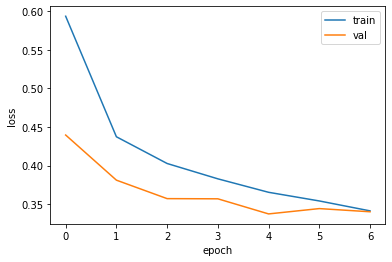

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [38]:
model.evaluate(val_scaled, val_target) #조기 종료로 얻은 모델의 검증 세트에 대한 성능

375/375 [==============================] - 1s 3ms/step - loss: 0.3373 - accuracy: 0.8785


[0.3373262584209442, 0.8784999847412109]